# 4.2.1 Deterministic case

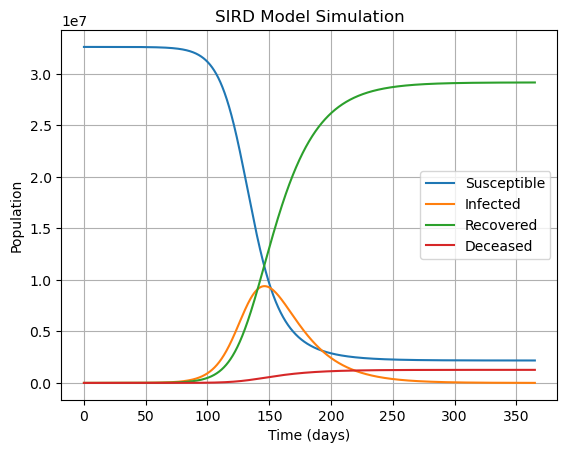

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
T0 = 0
T = 365
n = 36500

# Corrected computation of dt
dt = (T - T0) / n

lambda_val = 0.00000000424404
gamma = 0.0457600061
mu = 0.0019902810

# Initial conditions
initial_conditions = np.array([32625831, 116, 0, 1])

# Define the system of differential equations
def sird_model(S, I, R, D):
    dS = -lambda_val * S * I * dt
    dI = (lambda_val * S * I - gamma * I - mu * I) * dt
    dR = gamma * I * dt
    dD = mu * I * dt
    return np.array([dS, dI, dR, dD])

# Initialize matrix to store results
population_states = np.zeros((n, 4))
population_states[0, :] = initial_conditions

# Simulation of the model
for i in range(1, n):
    d_population = sird_model(*population_states[i - 1, :])
    population_states[i, :] = population_states[i - 1, :] + d_population

# Time array
time = np.linspace(T0, T, n)

# Plotting results
plt.plot(time, population_states[:, 0], label='Susceptible')
plt.plot(time, population_states[:, 1], label='Infected')
plt.plot(time, population_states[:, 2], label='Recovered')
plt.plot(time, population_states[:, 3], label='Deceased')

plt.legend()
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIRD Model Simulation')
plt.show()

# 4.2.2 Euler–Maruyama code

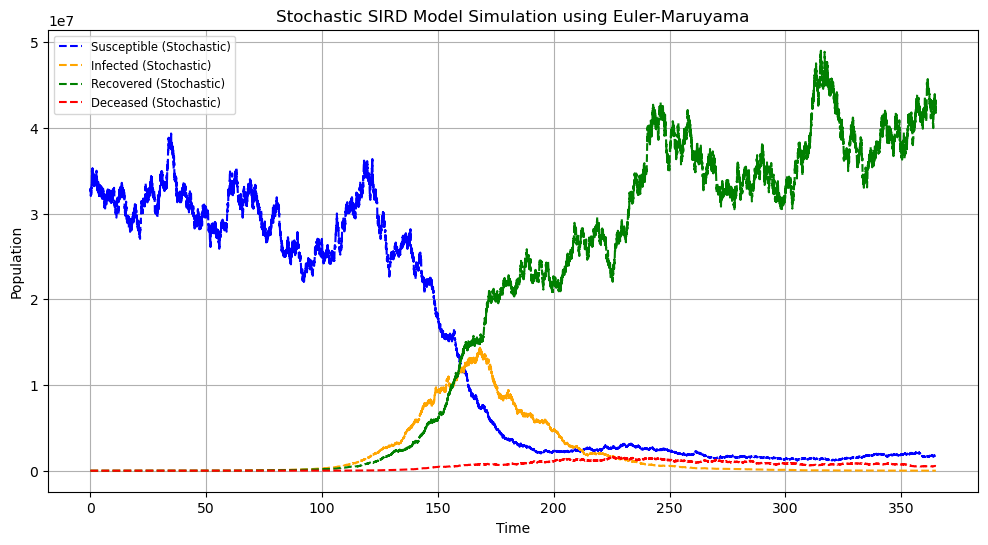

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters.
T0 = 0
T = 365
n = 36500
dt = (T - T0) / n

lambda_val = 0.00000000424404
gamma = 0.0457600061
mu = 0.0019902810
sigma1 = 0.05
sigma2 = 0.05
sigma3 = 0.05
sigma4 = 0.05

initial_conditions = np.array([32625831, 116, 0, 1])  # Corrected initial conditions

# Stochastic SIRD Model using Euler-Maruyama.
np.random.seed(100)

S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)

# Generate random noise for the Wiener process.
dW = np.sqrt(dt) * np.random.randn(n, 4)

# Initialize the initial conditions.
S[0] = 32625831
I[0] = 116
R[0] = 0
D[0] = 1

# Define the deterministic part of the SIRD model.
def f(S, I, R, D, lambda_val, gamma, mu):
    dS = -lambda_val * S * I
    dI = lambda_val * S * I - gamma * I - mu * I
    dR = gamma * I
    dD = mu * I
    return np.array([dS, dI, dR, dD])

# Define the stochastic part of the SIRD model.
def g(X, sigma1, sigma2, sigma3, sigma4):
    return np.array([[sigma1 * X[0], 0, 0, 0],
                     [0, sigma2 * X[1], 0, 0],
                     [0, 0, sigma3 * X[2], 0],
                     [0, 0, 0, sigma4 * X[3]]])

# Simulation using Euler-Maruyama method.
for i in range(1, n):
    X = np.array([S[i - 1], I[i - 1], R[i - 1], D[i - 1]])
    dX = f(*X, lambda_val, gamma, mu) * dt + g(X, sigma1, sigma2, sigma3, sigma4).dot(dW[i, :])
    X_new = X + dX
    S[i], I[i], R[i], D[i] = X_new

# Plotting results.
plt.figure(figsize=(12, 6))

# Stochastic SIRD using Euler-Maruyama.
plt.plot(np.arange(0, T + dt, dt), [S[0]] + list(S),
         label='Susceptible (Stochastic)', linestyle='dashed', color='blue')
plt.plot(np.arange(0, T + dt, dt), [I[0]] + list(I),
         label='Infected (Stochastic)', linestyle='dashed', color='orange')
plt.plot(np.arange(0, T + dt, dt), [R[0]] + list(R),
         label='Recovered (Stochastic)', linestyle='dashed', color='green')
plt.plot(np.arange(0, T + dt, dt), [D[0]] + list(D),
         label='Deceased (Stochastic)', linestyle='dashed', color='red')

plt.legend(fontsize='small')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Stochastic SIRD Model Simulation using Euler-Maruyama')
plt.show()

# 4.2.3 Milstein code

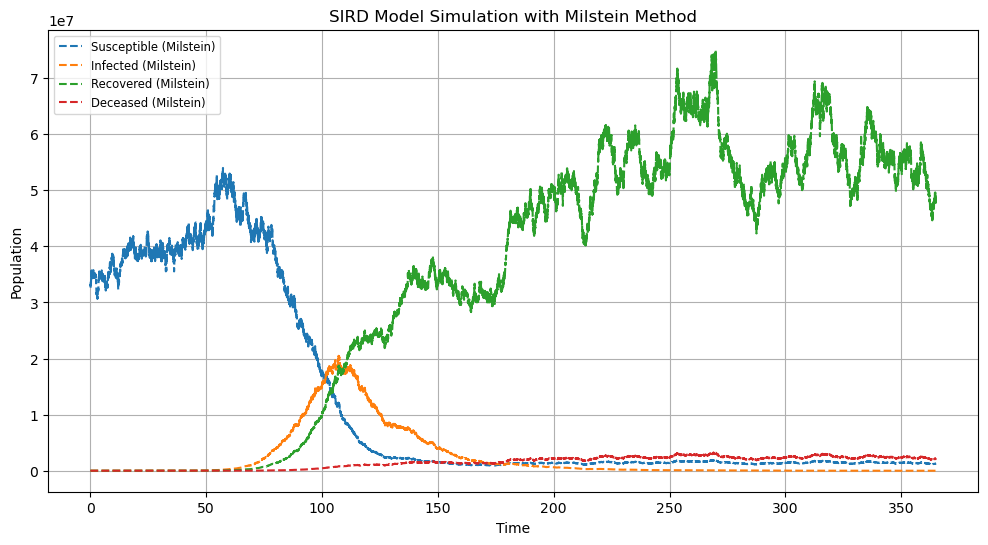

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters.
T0 = 0
T = 365
n = 36500
dt = (T - T0) / n

lambda_val = 0.00000000424404
gamma = 0.0457600061
mu = 0.0019902810
sigma1 = 0.05
sigma2 = 0.05
sigma3 = 0.05
sigma4 = 0.05

# Milstein method for the SIRD model.
S_milstein = np.zeros(n)
I_milstein = np.zeros(n)
R_milstein = np.zeros(n)
D_milstein = np.zeros(n)
dW = np.zeros(n)

# Initialize the initial conditions.
S_milstein[0] = 32625831
I_milstein[0] = 116
R_milstein[0] = 0
D_milstein[0] = 1

# Generate random noise for the Wiener process.
dW[0] = np.sqrt(dt) * np.random.randn()

# Simulation using Milstein method.
for i in range(1, n):
    dW[i] = np.sqrt(dt) * np.random.randn()

    # Update Susceptible (S) using Milstein method.
    S_milstein[i] = S_milstein[i - 1] - lambda_val * S_milstein[i - 1] * I_milstein[i - 1] * dt \
                    + sigma1 * S_milstein[i - 1] * dW[i - 1] \
                    + 0.5 * (sigma1 ** 2) * S_milstein[i - 1] * (dW[i - 1] ** 2 - dt)

    # Update Infected (I) using Milstein method.
    I_milstein[i] = I_milstein[i - 1] + (lambda_val * S_milstein[i - 1] * I_milstein[i - 1] \
                    - gamma * I_milstein[i - 1] - mu * I_milstein[i - 1]) * dt \
                    + sigma2 * I_milstein[i - 1] * dW[i - 1] \
                    + 0.5 * (sigma2 ** 2) * I_milstein[i - 1] * (dW[i - 1] ** 2 - dt)

    # Update Recovered (R) using Milstein method.
    R_milstein[i] = R_milstein[i - 1] + gamma * I_milstein[i - 1] * dt \
                    + sigma3 * R_milstein[i - 1] * dW[i - 1] \
                    + 0.5 * (sigma3 ** 2) * R_milstein[i - 1] * (dW[i - 1] ** 2 - dt)

    # Update Deceased (D) using Milstein method.
    D_milstein[i] = D_milstein[i - 1] + mu * I_milstein[i - 1] * dt \
                    + sigma4 * D_milstein[i - 1] * dW[i - 1] \
                    + 0.5 * (sigma4 ** 2) * D_milstein[i - 1] * (dW[i - 1] ** 2 - dt)

# Plotting results.
plt.figure(figsize=(12, 6))

# Stochastic SIRD using Milstein method.
plt.plot(np.arange(T0, T, dt), [S_milstein[0]] + list(S_milstein[1:]),
         linestyle='dashed', label='Susceptible (Milstein)')
plt.plot(np.arange(T0, T, dt), [I_milstein[0]] + list(I_milstein[1:]),
         linestyle='dashed', label='Infected (Milstein)')
plt.plot(np.arange(T0, T, dt), [R_milstein[0]] + list(R_milstein[1:]),
         linestyle='dashed', label='Recovered (Milstein)')
plt.plot(np.arange(T0, T, dt), [D_milstein[0]] + list(D_milstein[1:]),
         linestyle='dashed', label='Deceased (Milstein)')

plt.legend(fontsize='small')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIRD Model Simulation with Milstein Method')
plt.show()


# 4.2.4 Runge: Kutta 4 code

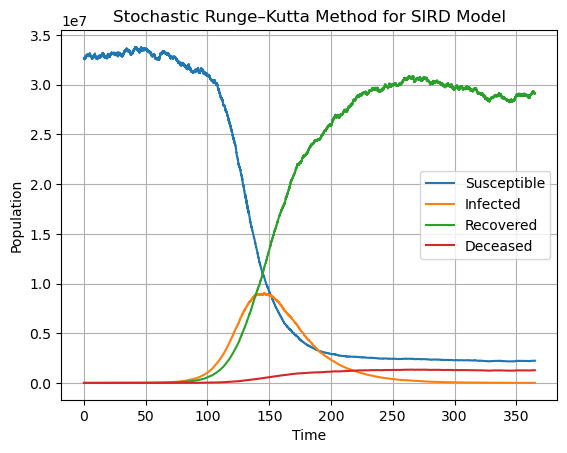

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility.
np.random.seed(100)

# Model parameters for the SIRD system.
T0 = 0
T = 365
n = 36500
dt = (T - T0) / n

lambda_val = 0.00000000424404
gamma = 0.0457600061
mu = 0.0019902810
sigma1 = 0.05
sigma2 = 0.05
sigma3 = 0.05
sigma4 = 0.05

# Initialize arrays to store S, I, R, D.
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)

# Initialize stochastic increments.
dW = np.sqrt(dt) * np.random.randn(4, n)  # Now dW has 4 components.

# Initial conditions.
S[0] = 32625831
I[0] = 116
R[0] = 0
D[0] = 1

# Define deterministic part of the system.
def deterministic_part(S, I, R, D):
    return np.array([-lambda_val * S * I,
                     lambda_val * S * I - gamma * I - mu * I,
                     gamma * I,
                     mu * I])

# Define stochastic part of the system.
def stochastic_part(S, I, R, D):
    return np.array([sigma1 * S, sigma2 * I, sigma3 * R, sigma4 * D])

# Stochastic Runge–Kutta method.
def stochastic_runge_kutta(X, f, g, dt, dW):
    stages = 4
    A = np.array([[0, 0, 0, 0],
                  [0.5, 0, 0, 0],
                  [0, 0.5, 0, 0],
                  [0, 0, 1, 0]])
    Gamma = np.array([[0, 0, 0, 0],
                      [0.5, 0, 0, 0],
                      [0, 0.5, 0, 0],
                      [0, 0, 1, 0]])
    b = np.array([1 / 6, 1 / 3, 1 / 3, 1 / 6])
    q = np.array([1 / 6, 1 / 3, 1 / 3, 1 / 6])
    c = np.array([0, 0.5, 0.5, 1])
    X_hat = np.zeros((stages, len(X)))
    for i in range(stages):
        sum_f = sum(A[i, j] * f(*X_hat[j]) for j in range(stages))
        sum_g = sum(Gamma[i, j] * g(*X_hat[j]) for j in range(stages))
        X_hat[i] = X + dt * sum_f + dW[i] * np.sqrt(dt) * sum_g
    sum_b = sum(b[j] * f(*X_hat[j]) for j in range(stages))
    sum_q = sum(q[j] * g(*X_hat[j]) for j in range(stages))
    X_new = X + dt * sum_b + dW[-1] * np.sqrt(dt) * sum_q
    return X_new

# Time-stepping loop.
for i in range(1, n):
    X = np.array([S[i - 1], I[i - 1], R[i - 1], D[i - 1]])
    X_new = stochastic_runge_kutta(X, deterministic_part, stochastic_part, dt, dW[:, i - 1])
    S[i], I[i], R[i], D[i] = X_new

# Plot results.
plt.plot(np.arange(0, T + dt, dt), [S[0]] + list(S), label='Susceptible')
plt.plot(np.arange(0, T + dt, dt), [I[0]] + list(I), label='Infected')
plt.plot(np.arange(0, T + dt, dt), [R[0]] + list(R), label='Recovered')
plt.plot(np.arange(0, T + dt, dt), [D[0]] + list(D), label='Deceased')

plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Stochastic Runge–Kutta Method for SIRD Model')
plt.show()